# Постановка задачи

Осуществить визуализацию двух любых признаков и посчитать коэффициент корреляции между ними; выполнить разбиение классов набора данных с помощью LDA (LinearDiscriminantAnalysis), осуществить визуализацию разбиения; осуществить классификацию с помощью методов LDA и QDA (LinearDiscriminantAnalysis и QuadraticDiscriminantAnalysis); сравнить полученные результаты.

# Исходные данные

•	Датасет: http://archive.ics.uci.edu/ml/datasets/seeds

•	Предметная область: семена пшениц

•	Задача: определить, к какому из 3х типов относится каждое семя (Kama, Rosa and Canadian)

•	Количество записей: 210

•	Количество атрибутов: 7

•	Атрибуты:

1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove.

# Ход работы

In [ ]:
from sklearn.model_selection import train_test_split
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import SVC

def split_data():
	ds = pandas.read_csv('seeds_dataset.txt', sep='\t', lineterminator='\n', header=None).values
	ds_attributes = ds[:, :-1]
	ds_class = ds[:, -1].astype(numpy.int64, copy=False)
	return ds_attributes, ds_class

def draw_plot(X, y, svc, a):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max),
    numpy.arange(y_min, y_max))
    Z = svc.predict(numpy.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    a.contourf(xx, yy, Z, cmap=plt.cm.plasma, alpha=0.8) 	
    a.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

def use_svm(occ_attr, occ_class, kernel, C, gamma, data_train, data_test, class_train, class_test):
    std_train_x, std_train_y = standard_transform(data_train, class_train)
    std_test_x, std_test_y = standard_transform(data_test, class_test)
    svc_train = SVC(kernel=kernel, C=C, gamma=gamma).fit(std_train_x, std_train_y)
    print('SVC: kernel = '+kernel+' C = '+str(C)+' gamma = '+str(gamma))
    pred_test = svc_train.predict(std_test_x)
    print('{:.2%}'.format(metrics.accuracy_score(std_test_y, pred_test)))
    print('\n')

def standard_transform(x, y):
    std_scale = preprocessing.StandardScaler().fit(x)
    x = std_scale.transform(x)
    return x[:, :2], y

In [5]:
def main():
    occ_attr, occ_class = split_data()
    attr_x, attr_y = standard_transform(occ_attr, occ_class)
    data_train, data_test, class_train, class_test = train_test_split(occ_attr, occ_class, test_size=0.30, random_state=123)

    show_svc(occ_attr, occ_class, attr_x, attr_y, data_train, data_test, class_train, class_test)
    show_c(occ_attr, occ_class, attr_x, attr_y, data_train, data_test, class_train, class_test)
    show_rbf(occ_attr, occ_class, attr_x, attr_y, data_train, data_test, class_train, class_test) 

In [6]:
# core function variation: linear & rbf
def show_svc(occ_attr, occ_class, attr_x, attr_y, data_train, data_test, class_train, class_test):
    f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
    c_linear = 'linear'
    c_rbf = 'rbf'
    for a,kernel in zip(ax, (c_linear,c_rbf)):
        svc = SVC(kernel=kernel, C=1,gamma=0.1).fit(attr_x, attr_y)
        use_svm(occ_attr, occ_class, kernel, 1, 0.1, data_train, data_test, class_train, class_test)
        draw_plot(attr_x, attr_y, svc, a)
    ax[0].set_title('SVC ' + c_linear + ' Kernel')
    ax[1].set_title('SVC ' + c_rbf + ' Kernel')
    plt.show()

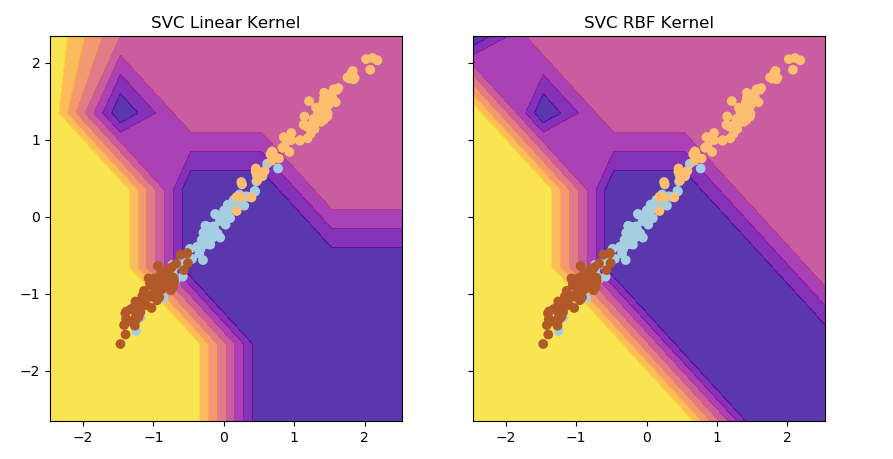

In [4]:
from IPython.display import Image
Image(filename='5.png')

In [7]:
# regularization variation (C): 1, 10, 100, 1000
def show_c(occ_attr, occ_class, attr_x, attr_y, data_train, data_test, class_train, class_test):
    f, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(15,5))
    c1 = 1
    c2 = 10
    c3 = 100
    c4 = 1000
    for a,C in zip(ax, (c1,c2,c3,c4)):
        svc = SVC(kernel='rbf', C=C,gamma=0.1).fit(attr_x, attr_y)
        use_svm(occ_attr, occ_class, 'rbf', C, 0.1, data_train, data_test, class_train, class_test)
        draw_plot(attr_x, attr_y, svc, a)
    ax[0].set_title('C = ' + str(c1))
    ax[1].set_title('C = ' + str(c2))
    ax[2].set_title('C = ' + str(c3))
    ax[3].set_title('C = ' + str(c4))
    plt.show()

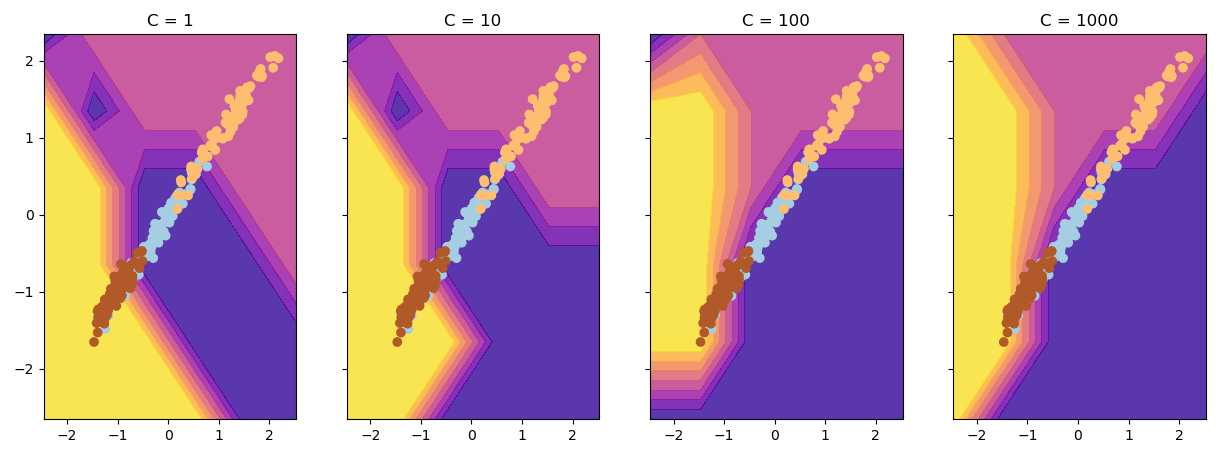

In [8]:
from IPython.display import Image
Image(filename='6.png')

In [9]:
# core coefficient variation (gamma): 0.1, 10, 100, 1000
def show_rbf(occ_attr, occ_class, attr_x, attr_y, data_train, data_test, class_train, class_test):
    f, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(15,5))
    r1 = 0.1
    r2 = 10
    r3 = 100
    r4 = 1000
    for a,gamma in zip(ax, (r1,r2,r3,r4)):
        svc = SVC(kernel='rbf', C=1,gamma=gamma).fit(attr_x, attr_y)
        use_svm(occ_attr, occ_class, 'rbf', 1, gamma, data_train, data_test, class_train, class_test)
        draw_plot(attr_x, attr_y, svc, a)
    ax[0].set_title('RBF gamma = ' + str(r1))
    ax[1].set_title('RBF gamma = ' + str(r2))
    ax[2].set_title('RBF gamma = ' + str(r3))
    ax[3].set_title('RBF gamma = ' + str(r4))
    plt.show()

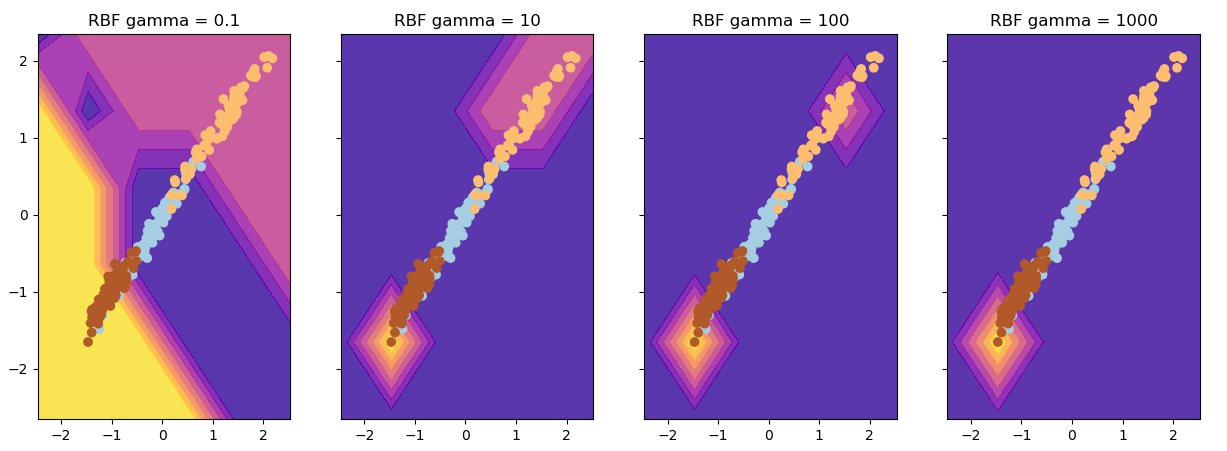

In [10]:
from IPython.display import Image
Image(filename='7.png')

# Результаты

SVC: kernel = linear C = 1 gamma = 0.1 61.90%
SVC: kernel = rbf C = 1 gamma = 0.1 63.49%
SVC: kernel = rbf C = 1 gamma = 0.1 63.49%
SVC: kernel = rbf C = 10 gamma = 0.1 65.08%
SVC: kernel = rbf C = 100 gamma = 0.1 61.90%
SVC: kernel = rbf C = 1000 gamma = 0.1 63.49%
SVC: kernel = rbf C = 1 gamma = 0.1 63.49%
SVC: kernel = rbf C = 1 gamma = 10 60.32%
SVC: kernel = rbf C = 1 gamma = 100 58.73%
SVC: kernel = rbf C = 1 gamma = 1000 44.44%

Согласно результатам, полученным в ходе лабораторной работы, можно сделать вывод о том, что на исследуемом датасете наилучшую точность продемонстрировал метод SVC с rbf ядром. Так, увеличение параметра ширины регуляризации C не сильно влияло на точность.
Наилучший результат = 65.08%, наихудший результат = 44.44%.
